# Assignment 3
All libraries needed to run the code are imported and is as follows

## Tasks
- You are given several data sets in text format.  For each of them:
  - Plot the data along with errorbars - explain how you obtain the size of the errorbars.
  - Propose a possible best curve fit for each of the data sets.  The exact nature of the function is not given, but some clues may be available.  
  - Perform a curve fitting using appropriate techniques for each of the data.  You need to explain whether you are choosing to use a linear or nonlinear curve fit, and why it is the right approach.  Comment on the accuracy of your approach and whether it gives a good result, or something better could have been done.
- For the straight line fit from the example above, compare the time taken, and accuracy of the fit, for `lstsq` *vs* `curve_fit`.  Comment on your observations.

## Importing Libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
from scipy.stats import norm
%matplotlib inline

We define a function to read files

In [37]:
def read_file(file):
    f = open(file, "r")
    ls = f.readlines()
    l = len(ls)
    ls = [ls[i].split(' ') for i in range(l)]
    x = np.array([float(ls[i][0]) for i in range(l)])
    y = np.array([float(ls[i][1]) for i in range(l)])
    f.close()
    return x, y

# Straight Line

In [38]:
x, y = read_file("dataset1.txt")

Inputting data for the first dataset.

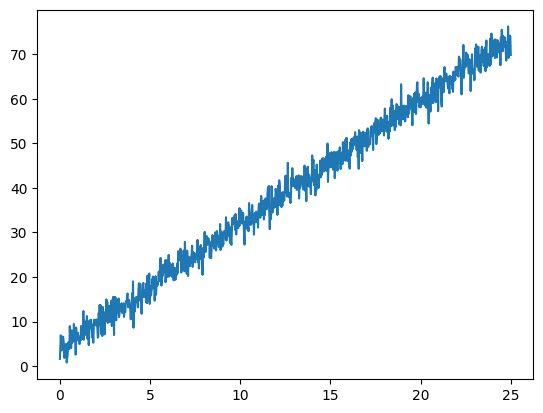

In [39]:
plt.plot(x, y)

Plotting the points on a graph.

In [40]:
def straight_line(t, m, c):
    return m*t + c

Defining the straight line equation.

The estimated equation is 2.791124245414918 t + 3.848800101430742
31.7 µs ± 2.55 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


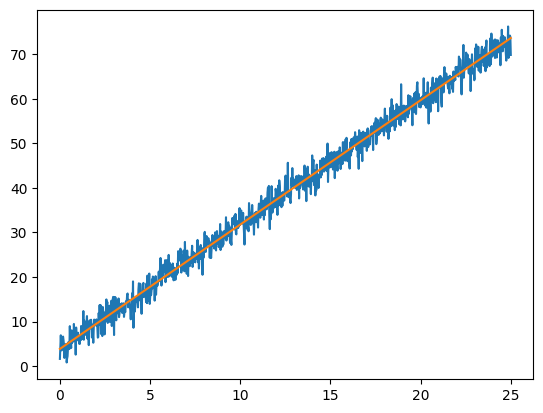

In [41]:
M = np.column_stack([x, np.ones(len(x))]) # initializing the M matrix for using least squares

(m, c), _, _, _ = np.linalg.lstsq(M, y, rcond=None) # using lstsq

print(f"The estimated equation is {m} t + {c}")
y_ls = np.array([m*x[i] + c for i in range(len(x))])
plt.plot(x, y, x, y_ls) # plotting both

%timeit np.linalg.lstsq(M, y, rcond=None)

We use `lstsq` function to estimate the straight line and time taken is seen using `%timeit%`.

The estimated equation is 2.7911242448201588 t + 3.848800111263445
252 µs ± 2.85 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


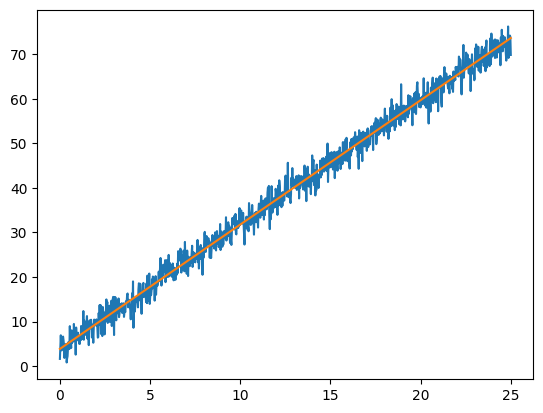

In [42]:
(m1, c1), _ = curve_fit(straight_line, x, y)
print(f"The estimated equation is {m1} t + {c1}")
y_cf = np.array([straight_line(x[i], m1, c1) for i in range(len(x))])
plt.plot(x, y, x, y_cf)

%timeit curve_fit(straight_line, x, y)

We use the `curve_fit` function to estimate the values of slope and intercept in the `straight_line` fucntion. This estimates it as a straight line for the given set of datapoints. The time taken is also observed.

In [43]:
sq_err1 = np.sum((y_ls - y)**2)

sq_err2 = np.sum((y_cf - y)**2)

print(f"The error using 'lstsq' function is {sq_err1}.")
print(f"The error using 'curve_fit' function is {sq_err2}.")

The error using 'lstsq' function is 3983.4123805732743.
The error using 'curve_fit' function is 3983.412380573275.


We calculate the sum of sqaure of errors of both methods to compare accuracies. 
It is observed that both perform eqaully well. 

Now coming to the time taken, we see that `lstsq` is faster tha `curve_fit`, this may be because of the way the `lstsq` is coded internally. But, `curve_fit` can fit curves other than linear ones.

The standard deviation of difference error is 1.2033609322616172


<ErrorbarContainer object of 3 artists>

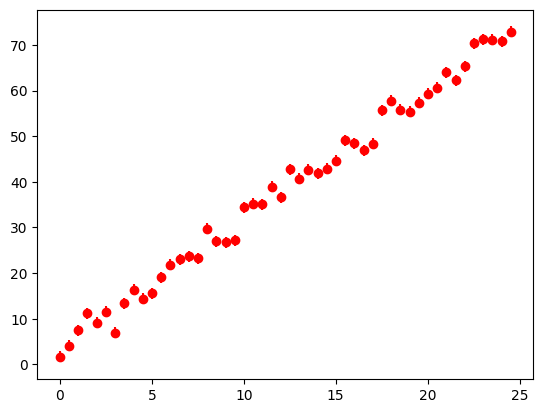

In [44]:
print("The standard deviation of difference error is", np.std(abs(y_ls - y)))

plt.errorbar(x[::20], y[::20], np.std(abs(y_ls - y)), fmt='ro')

Here we have plotted a rough error graph assuming length being the standard deviation of the absolute value difference between estimated value and true value.

# Fourier Series

In [45]:
x, y = read_file("dataset2.txt")

Reading the data points.

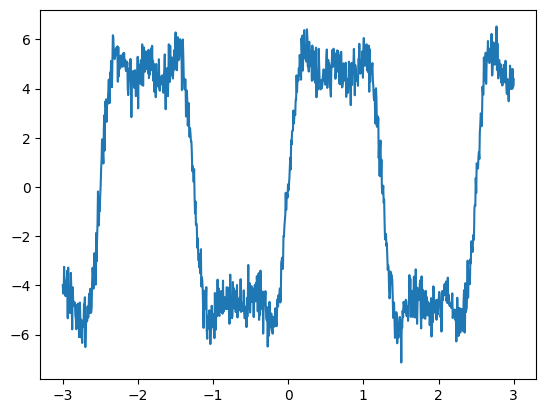

In [46]:
plt.plot(x, y)

Plotting the data points.

## Observation

After looking at the graph, we observe that it is a square wave with three dominant frequencies. This conclusion was arrived at after using `Desmos` with arbitrary values of amplitudes and frquencies. I played around using 2 to 5 frequencies on the website and came to the conclusion that three dominant fequencies exist.

Now we try to curvefit an appropriate fourier series.

$$f(x) = \frac{4}{\pi}\sum_{n=3}\frac{A_i}{n}\sin(\frac{n \pi x}{L})$$

In [47]:
def sinf(t, L, a1, a2, a3):
    return (4/np.pi) * (a1*(1/1) * np.sin(1*np.pi*t/L) + a2*(1/3) * np.sin(3*np.pi*t/L) + a3*(1/5) * np.sin(5*np.pi*t/L))

The fourier series with 3 dominant frequencies.

The values L = 1.2502683966806776, A1 = 4.721122662533784, A2 = 4.715824925484774 and A3 = 3.852015996967846.


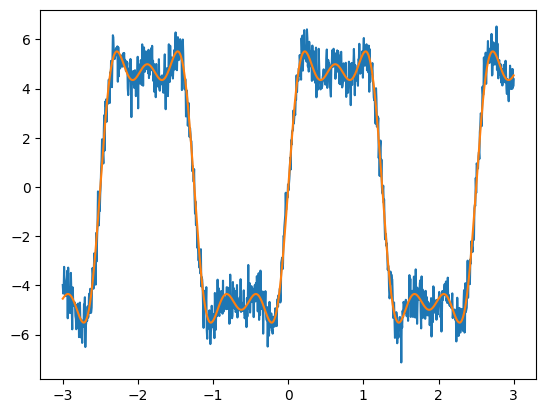

In [48]:
#using curve_fit function to find 'A's and frequency
(L, a1, a2, a3), _ = curve_fit(sinf, x[:], y[:])

print(f"The values L = {L}, A1 = {a1}, A2 = {a2} and A3 = {a3}.")

yest = sinf(x, L, a1, a2, a3)
#plotting data points and the estimated curve
plt.plot(x, y, x, yest)

We observe that the first 3 odd harmonics are the most dominant in the Fourier series expansion of the following distribution. The function is estimated accordingly using the `curve_fit` function to find the fundamental frequency and amplitudes of each harmonic.

<ErrorbarContainer object of 3 artists>

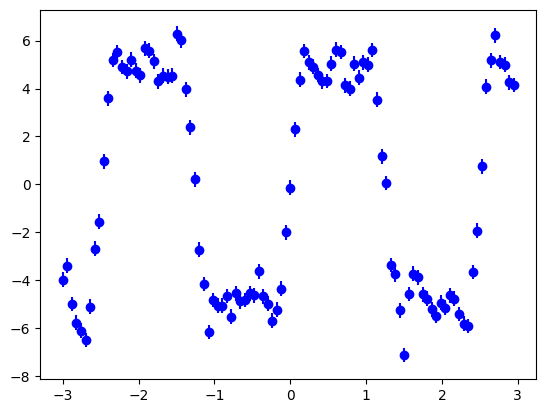

In [49]:
err = np.std(abs(yest - y))
#plotting the errorbar
plt.errorbar(x[::10], y[::10], err, fmt='bo')

We have plotted the rough error plot for the given function. We assume the error bar length to be estimated as the standard deviation of the difference between estimated value and the true value.

# Planck's Constant

In [50]:
x, y = read_file("dataset3.txt")

Reading the data points.

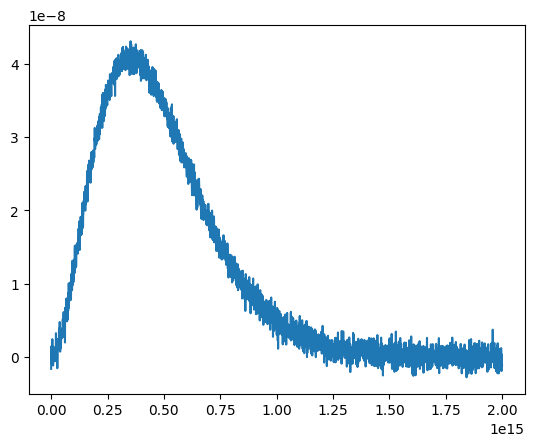

In [51]:
plt.plot(x, y)

Plotting the data points

The formula for **Black Body Radiation**

$$B(T) = \frac{1}{c^2} \frac{2hf^3}{e^{\frac{hf}{kT}} - 1}$$

The estimated value of h (Planck constant) is 6008.535761688714.

The estimated value of T (temperature) is 6.643229748517771e-34.



/tmp/ipykernel_2381962/3038760952.py:4: RuntimeWarning: overflow encountered in exp
  return ((2*h*f*f*f)/(c*c))* (1.0/(np.exp((h/k)*(f/T)) - 1.0))


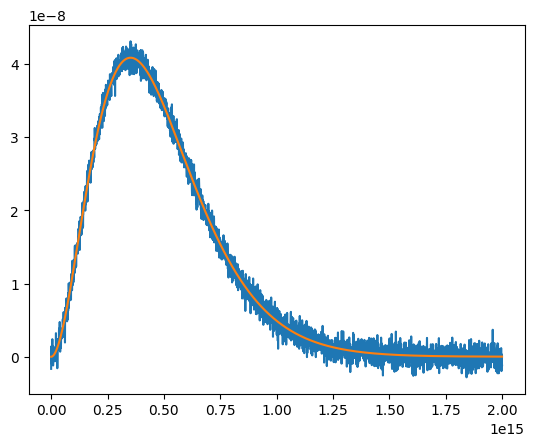

In [52]:
c= 3.0e8
k = 1.380649e-23
def bbr(f, T, h):
    return ((2*h*f*f*f)/(c*c))* (1.0/(np.exp((h/k)*(f/T)) - 1.0))

# Estimating h and T
(h_est, T_est), pcov = curve_fit(bbr, x, y, p0 = [1000.0, 6e-34]) 
# p0 is initial guess for the parameters
# if p0 is default (None), it may lead to overflow in exponential term, we see that we avoid the error but still get a warning
print(f'The estimated value of h (Planck constant) is {h_est}.\n')
print(f'The estimated value of T (temperature) is {T_est}.\n')
y_est = bbr(x, h_est, T_est) #fitting a curve
plt.plot(x,y,x,y_est)

The spectral radiance equation is defined in `bbr`function and is used in the `curve_fit` function for finding the values of `T` and `h`.

We see that $T = 6008.536K$ and $h = 6.6432 \times 10^{-34} J.s$

<ErrorbarContainer object of 3 artists>

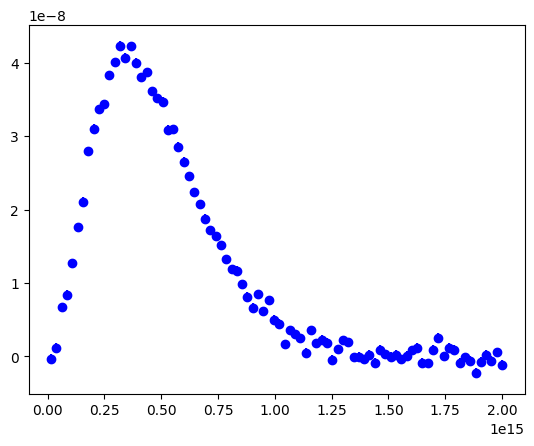

In [53]:
err = np.std(abs(y_est - y))
#plotting the error bar
plt.errorbar(x[::35], y[::35], err, fmt='bo')

Plotting the rough error plot for the given function. We assume the error bar lenght to be estimated to the standard deviation of the difference between estimated value and the true value.

# Dataset 4 (Unknown Generation)

In [54]:
x, y = read_file("dataset4.txt")

Reading the data points.

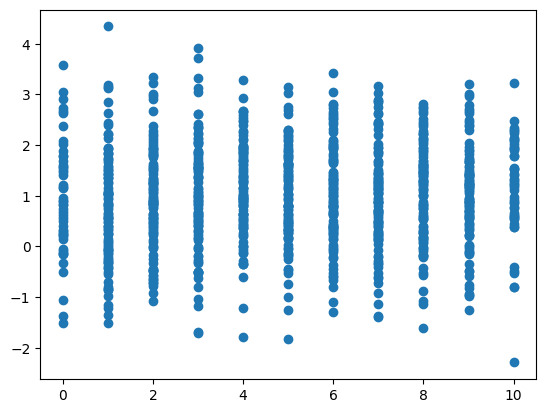

In [55]:
plt.scatter(x, y) #discrete plotting beacuse lines give us random joins in between x values

Plotting the datapoints in continuous space.

## Approach

The given dataset has x values as integers and we observe that each integer has multiple values of y. This is not a function, as it is one-many in nature. We try to analyze each set of integer value of x and observe the corresponding values of y.

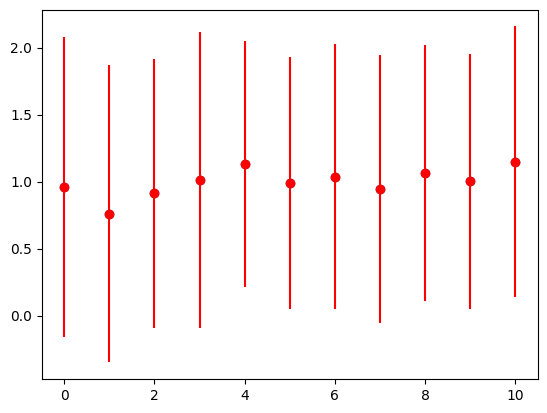

In [56]:
temp = [[] for i in range(11)]
for i in range(len(x)): #taking different values of y for each x
    for j in range(11):
        if int(x[i]) == j:
            temp[j].append(y[i])
mean = [np.mean(temp[i]) for i in range(11)]
std = [np.std(temp[i]) for i in range(11)]
x_est = [i for i in range(11)]
plt.scatter(x_est, mean)

#plotting the error bar using standard deviation as error
for i in range(11):
    plt.errorbar(i, mean[i], std[i], fmt='ro')

We seperate all of values of y into each x by using the `temp` array. Then we try to find mean of each set of values corresponding to that integer along with its standard deviation, which is then plotted as an error bar. The mean serves as an approximation of the distribution and the standard deviation is used as an indication of error for that integer value.

In [57]:
def erfunc(x, a, m, s):
    return a * (norm.cdf(x-m)/s)

This is the Cumulative Distribution Function of a Gaussian or Normal Distribution.

The mean is 0.9781125070646076, amplitude is 11.558972844947832, and standard deviation is 0.11951977740169624


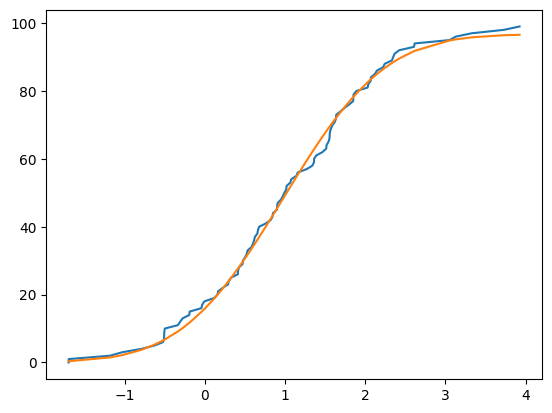

In [58]:
#the integer value of x under observation
p = 3

x_f = np.array([i for i in range(len(temp[p]))])
temp[p].sort() #sorting y values
(a, m, s), _ = curve_fit(erfunc, temp[p], x_f) #curve fitting to find amplitude, mean and standard deviation.
print(f"The mean is {m}, amplitude is {a}, and standard deviation is {s}")
y_f = np.array([erfunc(temp[p][i], a, m, s) for i in range(len(temp[p]))])
plt.plot(temp[p], x_f, temp[p], y_f)

We see that y follows an $erf$ function for with a mean and standard deviation for each `x` from $0$ to $10$. We can verify by changing the `p` variable from 0 to 10 in the above block. We use `curve_fit` to get the curve and then plot it.

This imples y values are gaussian distribution with a mean and a standard deviation for its corresponding value of x. The bell-curve fit is a good curve for this dataset for each integer value of x.